# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеку pandas.
# читаем csv-файл и выводим первые 5 строк.
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [2]:
# выводим основную информацию о датафрейме.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

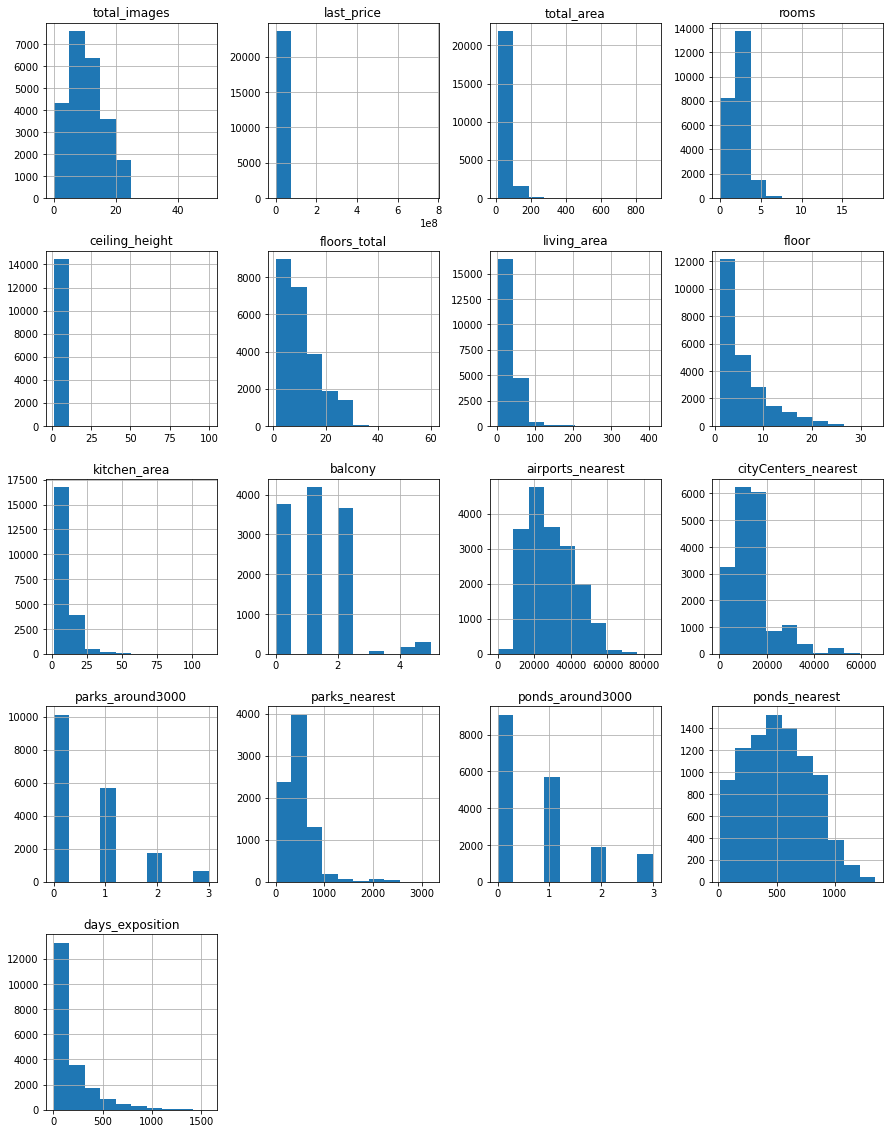

In [3]:
data.hist(figsize=(15, 20))

In [4]:
data_old_shape = data.shape
print(data_old_shape)

(23699, 22)


### Предобработка данных

In [5]:
# выводим колличество пропущеных значений для каждого столбца.
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


К причинам, которые могли привести к пропускам в данных, можно отнести: незаполнение ячеек по незнанию информации, нет данной информации в системе, неправильное заполнение данных.

In [6]:
# заполняем пропущенный значения в коллонке balcony числом 0.
# изменяем тип данных на int.
data['balcony'] = data['balcony'].fillna(0).astype(int)

Количество балконов считается целыми числами. Так визуально удобнее работать с данными.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


In [8]:
# код ревьюера
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


In [9]:
# посчитал медианным значением высоту потолков.
data['ceiling_height'].median()

2.65

In [10]:
# заполнил пропуск медианным значением.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Гладкое                        1
деревня Большая Пустомержа             1
посёлок Плоское                        1
посёлок Платформа 69-й километр        1
посёлок Белоостров                     1
Name: locality_name, Length: 364, dtype: int64

In [12]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской', 'станции', 'городского типа', 'коттеджный', 'поселок', 'село', 'деревня', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'поселок при железнодорожной станции', 'при железнодорожной', 'имени', ' '], '', regex=True)
)

In [13]:
data['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Мыза-Ивановка          1
Снегиревка             1
НоваяРопша             1
Гончарово              1
Ропша                  1
Name: locality_name, Length: 305, dtype: int64

In [14]:
# Изменяем тип данных на только дату без времени(так как время у всех дат стоит 00-00-00)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


### Посчитайте и добавьте в таблицу новые столбцы

In [58]:
# цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, 
# а затем округлить до двух знаков после запятой);
data['price_one_meter'] = (data['last_price'] / data['total_area']).round(2)
print(data['price_one_meter'])

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_one_meter, Length: 23699, dtype: float64


In [16]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['day_publication'] = data['first_day_exposition'].dt.weekday

In [17]:
# месяц публикации объявления
data['month_publication'] = (data['first_day_exposition']).dt.month

In [18]:
# год публикации объявления;
data['year_publication'] = (data['first_day_exposition']).dt.year

In [19]:
# тип этажа квартиры (значения — «первый», «последний», «другой»);
def floors_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floors_category'] = data.apply(floors_category, axis = 1)

In [20]:
# посчитаем расстояние до центра города в километрах (переведем из м в км и округлим до ближайших целых значений).
data['distance_center_kilometrs'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1            2.65          11.0         18.6      1          NaN  ...   
2            2.65           5.0         34.3      4          NaN  ...   
3            2.65          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   ponds_around3000  ponds_nearest  days_exposition  first_day_year  \
0               2.0          755.0              NaN            

In [21]:
# Код ревьюера
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_one_meter,day_publication,month_publication,year_publication,floors_category,distance_center_kilometrs
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,2019,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,2018,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2.0,574.0,558.0,2015,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,3.0,234.0,424.0,2015,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,2018,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

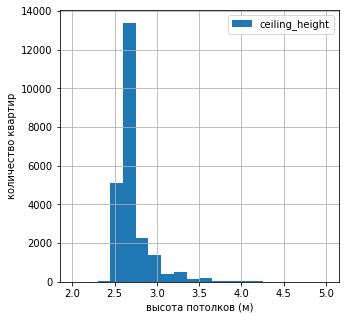

In [22]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, range = (2, 5), grid=True, figsize=(5, 5))
plt.xlabel('высота потолков (м)')
plt.ylabel('количество квартир')
data['ceiling_height'].describe()

Высота потолков в среднем 2.7 метра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

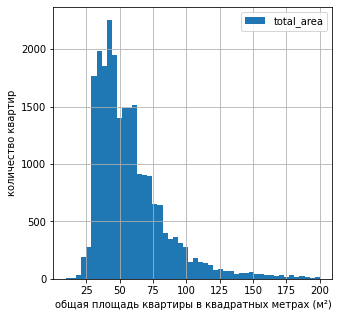

In [23]:
data.plot(y = 'total_area', kind = 'hist', bins = 50, range = (10, 200), grid=True, figsize=(5, 5))
plt.xlabel('общая площадь квартиры в квадратных метрах (м²)')
plt.ylabel('количество квартир')
data['total_area'].describe()

В среднем квартиры колебаются от 26 до 65 квадратных метров.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

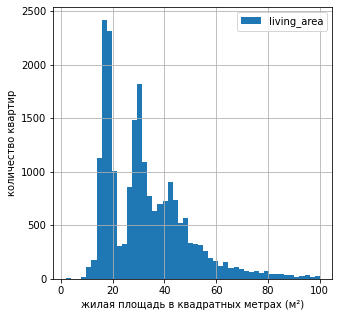

In [24]:
data.plot(y = 'living_area', kind = 'hist', bins = 50, range = (2, 100), grid=True, figsize=(5, 5))
plt.xlabel('жилая площадь в квадратных метрах (м²)')
plt.ylabel('количество квартир')
data['living_area'].describe()

Чаще вчего встречаются квартиры с жилой площадью от 15 до 20 кв/м и от 23 до 40 кв/м.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

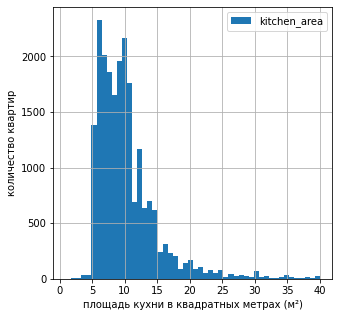

In [25]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, range = (1, 40), grid=True, figsize=(5, 5))
plt.xlabel('площадь кухни в квадратных метрах (м²)')
plt.ylabel('количество квартир')
data['kitchen_area'].describe()

Площадь кухни занимает от 5 до 12 квадрытных метров в квартирах.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

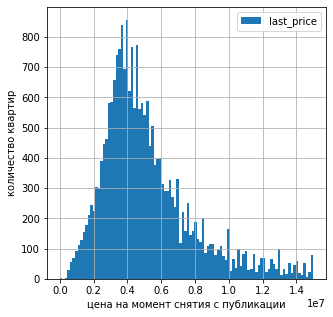

In [26]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, range = (0, 15000000), grid=True, figsize=(5, 5))
plt.xlabel('цена на момент снятия с публикации')
plt.ylabel('количество квартир')
data['last_price'].describe()

Средняя цена квартир 6.5 миллионов. Хотя медианное значение 4.5 миллиона.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

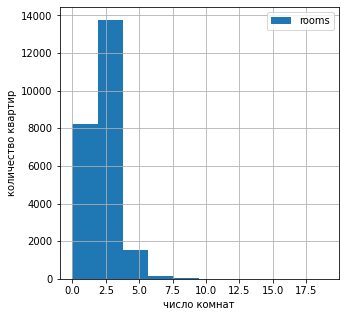

In [27]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize=(5, 5))
plt.xlabel('число комнат')
plt.ylabel('количество квартир')
data['rooms'].describe()

Среднее и медианное значение одинакивые и составляют 2 комнаты.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

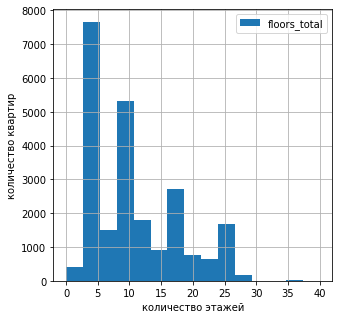

In [28]:
data.plot(y = 'floors_total', kind = 'hist', bins = 15, range = (0, 40), grid=True, figsize=(5, 5))
plt.xlabel('количество этажей')
plt.ylabel('количество квартир')
data['floors_total'].describe()

Основные здания в данном графике являются 5,10,22 и 25 этажные сооружения.

In [29]:
print(data.shape)
print(data_old_shape)

(23699, 29)
(23699, 22)


Text(0, 0.5, 'количество квартир')

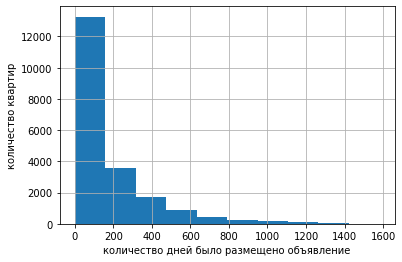

In [30]:
data['days_exposition'].hist()
plt.xlabel('количество дней было размещено объявление')
plt.ylabel('количество квартир')

In [31]:
data['days_exposition'].median()

95.0

In [32]:
data['days_exposition'].mean()

180.88863436982163

In [33]:
data[data['days_exposition'] != 0]
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

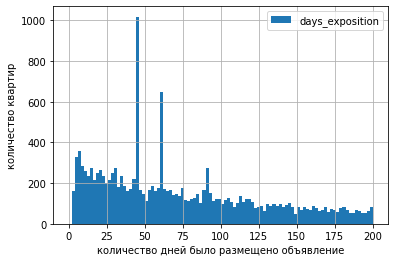

In [34]:
data.plot(y= 'days_exposition', kind= 'hist', bins= 100, grid= True, range= (0,200))
plt.xlabel('количество дней было размещено объявление')
plt.ylabel('количество квартир')
data['days_exposition'].describe()

Из выведенных данных мы видим, что среднее значение снятия публикации это 180 дней. Но в данных сильно выделяются дни 7,45,60,90 от таких дней нам надо избавиться.

count    19746.000000
mean       186.243037
std        222.222566
min          1.000000
25%         45.000000
50%        102.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64

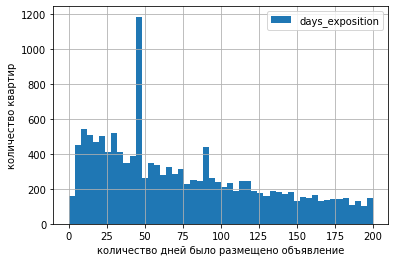

In [35]:
good_data = data.query('days_exposition != 7 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')
good_data.plot(y= 'days_exposition', kind= 'hist', bins= 50, grid= True, range= (0,200)) 
plt.xlabel('количество дней было размещено объявление')
plt.ylabel('количество квартир')
good_data['days_exposition'].describe()

Вывод: после удаления вбросов мы видим, что среднее время снятия публикации узменилось всего на 6 дней. Быстрая продажа осуществляется так же в течение 45 дней. Более полугода считается уже долгая продажа квартир.

Text(0, 0.5, 'цена квартиры')

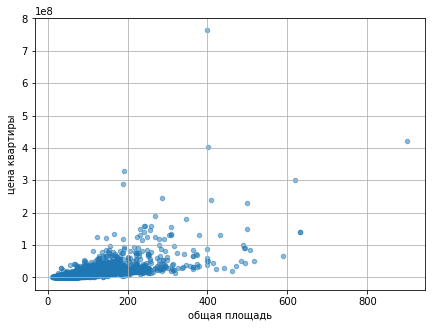

In [36]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.5, figsize=(7,5))
plt.xlabel('общая площадь')
plt.ylabel('цена квартиры')

Text(0, 0.5, 'цена за 1кв. метр')

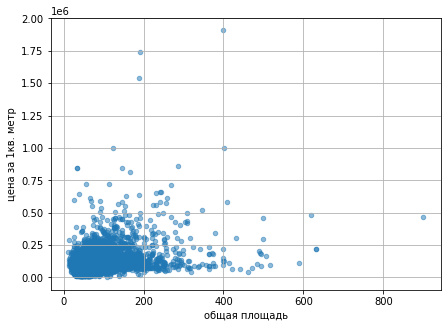

In [37]:
data.plot(x='total_area', y='price_one_meter', kind='scatter', grid=True, alpha=0.5, figsize=(7,5))
plt.xlabel('общая площадь')
plt.ylabel('цена за 1кв. метр')

Text(0, 0.5, 'цена квартиры')

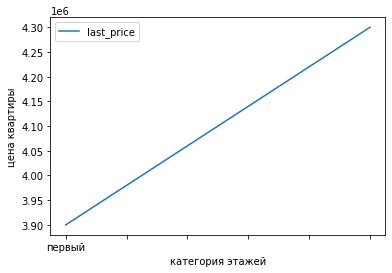

In [38]:
(
    data
    .query('floors_category != "другой"')
    .pivot_table(index='floors_category', values='last_price', aggfunc = ['mean', 'count','median'])
    .plot(y='median')
)
plt.xlabel('категория этажей')
plt.ylabel('цена квартиры')

Text(0, 0.5, 'цена за 1кв. метр')

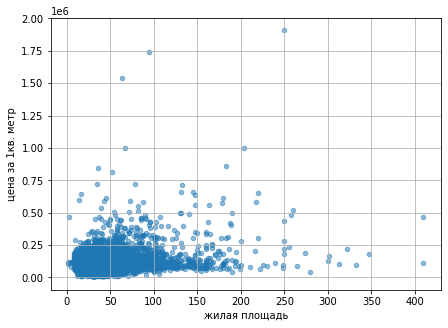

In [39]:
data.plot(x='living_area', y='price_one_meter', grid=True, kind='scatter', figsize=(7,5), alpha = 0.5)
plt.xlabel('жилая площадь')
plt.ylabel('цена за 1кв. метр')

Text(0, 0.5, 'цена квартиры')

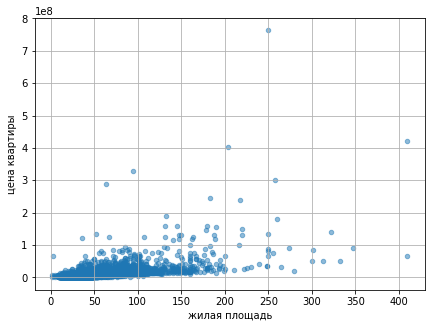

In [40]:
data.plot(x='living_area', y='last_price', grid=True, kind='scatter', figsize=(7,5), alpha = 0.5)
plt.xlabel('жилая площадь')
plt.ylabel('цена квартиры')

Text(0, 0.5, 'цена квартиры')

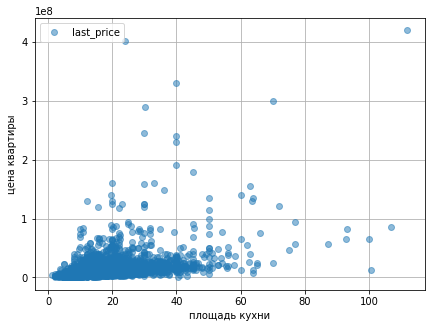

In [41]:
data.plot(x='kitchen_area', y='last_price', grid=True, figsize=(7,5), style='o', alpha = 0.5)
plt.xlabel('площадь кухни')
plt.ylabel('цена квартиры')

Text(0, 0.5, 'цена за 1кв. метр')

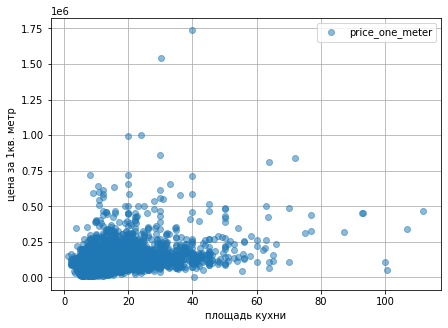

In [42]:
data.plot(x='kitchen_area', y='price_one_meter', grid=True, figsize=(7,5), style='o', alpha = 0.5)
plt.xlabel('площадь кухни')
plt.ylabel('цена за 1кв. метр')

Text(0, 0.5, 'цена квартиры')

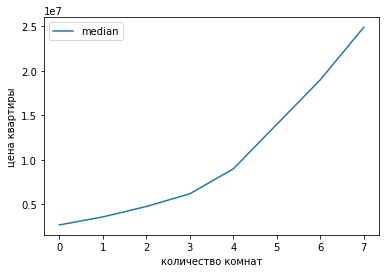

In [43]:
price_rooms = data.pivot_table(index= 'rooms',values= 'last_price', aggfunc = ['mean', 'count','median'])
price_rooms.columns = ['mean', 'count','median']
price_rooms.query('count > 50').plot(y = 'median')
plt.xlabel('количество комнат')
plt.ylabel('цена квартиры')

Вывод: как видно из графика цена растет вместе с количеством комнат.

Text(0, 0.5, 'цена за 1кв. метр')

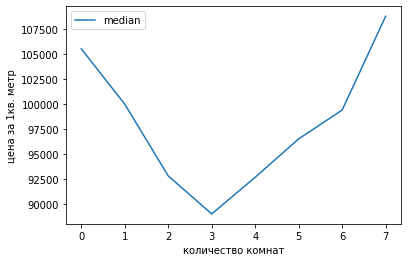

In [44]:
price_rooms = data.pivot_table(index= 'rooms',values= 'price_one_meter', aggfunc = ['mean', 'count','median'])
price_rooms.columns = ['mean', 'count','median']
price_rooms.query('count > 50').plot(y = 'median')
plt.xlabel('количество комнат')
plt.ylabel('цена за 1кв. метр')

Вывод: 3х комнатные квартиры являются самыми дешовыми за квадратный метр.

Text(0, 0.5, 'цена квартиры')

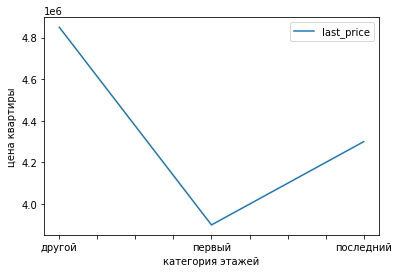

In [45]:
(
    data
    .pivot_table(index='floors_category', values='last_price', aggfunc = ['mean', 'count', 'median'])
    .plot(y='median')
)
plt.xlabel('категория этажей')
plt.ylabel('цена квартиры')

Вывод: как видно из графика, первый этаж является самым дешовым даже в сравнении с последним.

Text(0, 0.5, 'цена за 1кв. метр')

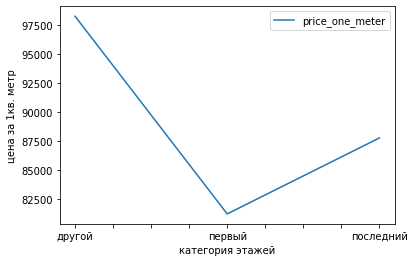

In [46]:
(
    data
    .pivot_table(index='floors_category', values='price_one_meter', aggfunc = ['mean', 'count', 'median'])
    .plot(y='median')
)
plt.xlabel('категория этажей')
plt.ylabel('цена за 1кв. метр')

Вывод: как видно из графика, первый этаж является самым дешовым даже в сравнении с последним.

Text(0, 0.5, 'цена квартиры')

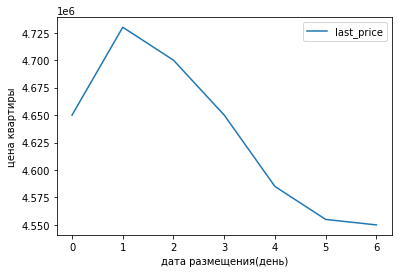

In [47]:
(
    data
    .pivot_table(index='day_publication', values='last_price', aggfunc =['median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(день)')
plt.ylabel('цена квартиры')

Вывод: размещение квартиры не критично но влияет на цену квартиры. Пик начинается со вторника и с каждый мледующим днем падает, вплоть до конца недели.

Text(0, 0.5, 'цена за 1кв. метр')

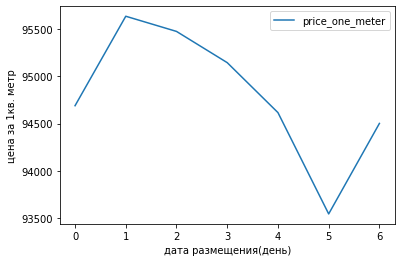

In [48]:
(
    data
    .pivot_table(index='day_publication', values='price_one_meter', aggfunc =['median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(день)')
plt.ylabel('цена за 1кв. метр')

Вывод: Размещение влияет на цену но не критично. Во вторник самий высокий ценник и с каждый следующим днем ценник падает. Суббота является самым дешевым днем (цены за 1кв.метр).

Text(0, 0.5, 'цена квартиры')

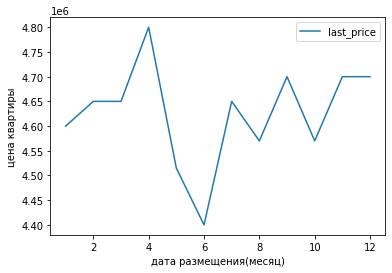

In [49]:
(
    data
    .pivot_table(index='month_publication', values='last_price', aggfunc =['median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(месяц)')
plt.ylabel('цена квартиры')

Вывод: июнь является самым плохим месяцем для выставления квартиры на продажу.

Text(0, 0.5, 'цена за 1кв. метр')

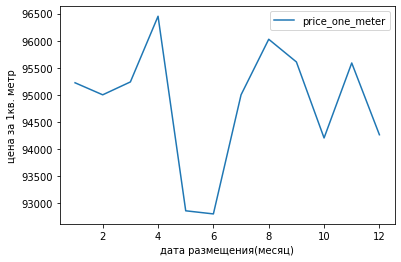

In [50]:
(
    data
    .pivot_table(index='month_publication', values='price_one_meter', aggfunc =['median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(месяц)')
plt.ylabel('цена за 1кв. метр')

Вывод: Май и Июнь являются самыми дешевыми месяцами для размещения объявлений на квартиры.

Text(0, 0.5, 'цена квартиры')

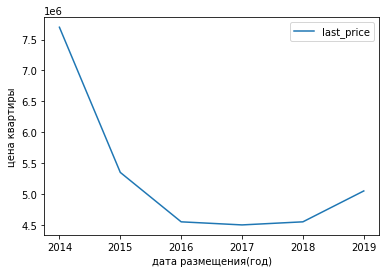

In [51]:
(
    data
    .pivot_table(index='year_publication', values='last_price', aggfunc = ['mean', 'count', 'median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(год)')
plt.ylabel('цена квартиры')

Вывод: как мы видим из графика с 2014 года цена сильно упала и только с 2018 виден рост.

Text(0, 0.5, 'цена за 1кв. метр')

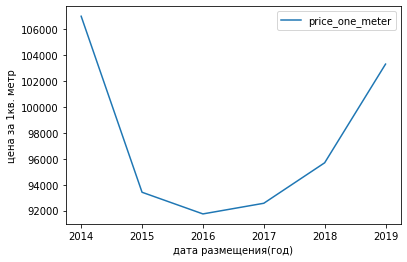

In [52]:
(
    data
    .pivot_table(index='year_publication', values='price_one_meter', aggfunc = ['mean', 'count', 'median'])
    .plot(y='median')
)
plt.xlabel('дата размещения(год)')
plt.ylabel('цена за 1кв. метр')

Вывод: с 2014 года наблюдался спад цена за 1кв.метр и только с 2017 цена начала рости.

In [53]:
top_10_name = data.pivot_table(index= 'locality_name', values= 'price_one_meter',aggfunc = ['mean', 'count'])
top_10_name.columns = ['mean', 'count']
top_10_name = top_10_name.sort_values('count', ascending = False).head(10).astype(int)
top_10_name

,mean,count
locality_name,,
Санкт-Петербург,114849,15721
Мурино,86087,590
Кудрово,95324,472
Шушары,78677,440
Всеволожск,68654,398
Пушкин,103125,369
Колпино,75424,338
Парголово,90175,327
Гатчина,68746,307


Text(0, 0.5, 'цена за 1 кв. метр')

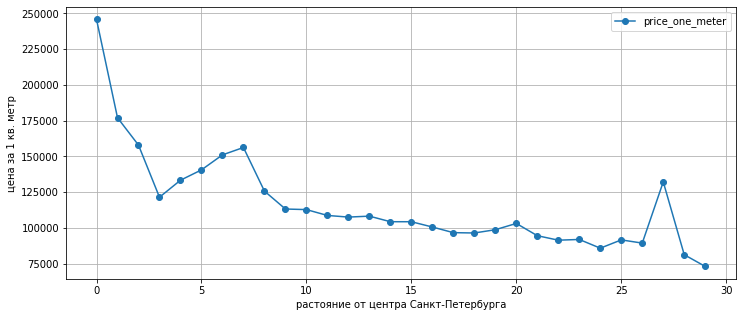

In [54]:
(
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index= 'distance_center_kilometrs', values= 'price_one_meter',aggfunc = 'mean')
    .plot(marker='o', grid=True, figsize=(12, 5))
)
plt.xlabel('растояние от центра Санкт-Петербурга')
plt.ylabel('цена за 1 кв. метр')

### Общий вывод

К основным параметрам, влияющим на цену объектов, можно отнести этажность квартиры, количество комнат, в каком месяце и в какой день было высталенно объявление. По результатам анализа к самым дешевым квартирам можно отнести 3х комнатыне квартиры, на первых этажах, выставленные в летний период. Так же можно заметить, что день недели и месяц выставления объявления о продаже квартиры влияет на цену за 1 кв. метр. Более рентабельными квартирами являются 1 комнатные квартиры не на первых этажах выставленные в осенний или весенний периоды.